# Инжиниринг категориальных признаков

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
CS_data = pd.read_csv("C:\\Users\\222844\\Downloads\\Customer_support_data.csv")
CS_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [172]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [173]:
CS_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


In [174]:
T_data = pd.read_csv("C:\\Users\\222844\\Downloads\\titanic.csv")
T_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
T_data.describe(exclude=[np.number])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<Axes: xlabel='channel_name', ylabel='Count'>

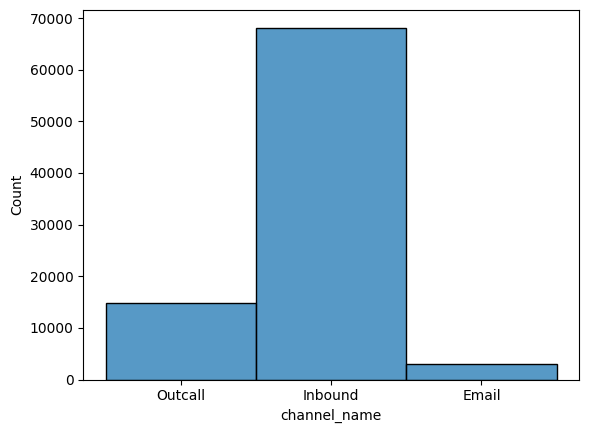

In [176]:
sns.histplot(data=CS_data, x="channel_name")

In [177]:
CS_data.channel_name.value_counts()

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



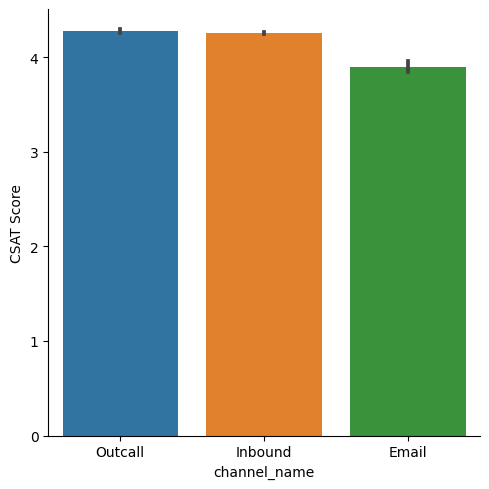

In [178]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

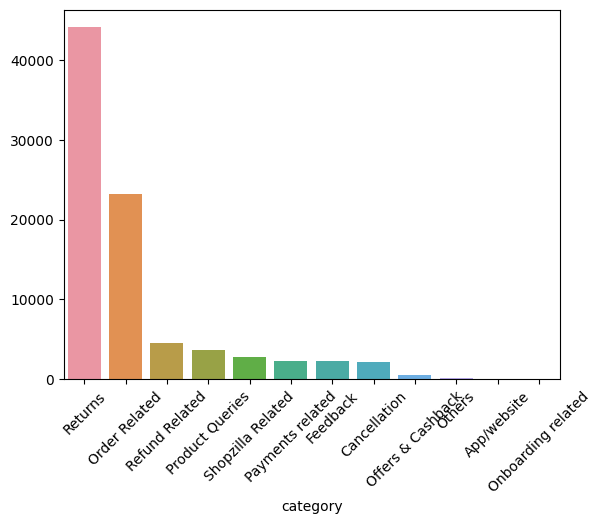

In [179]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



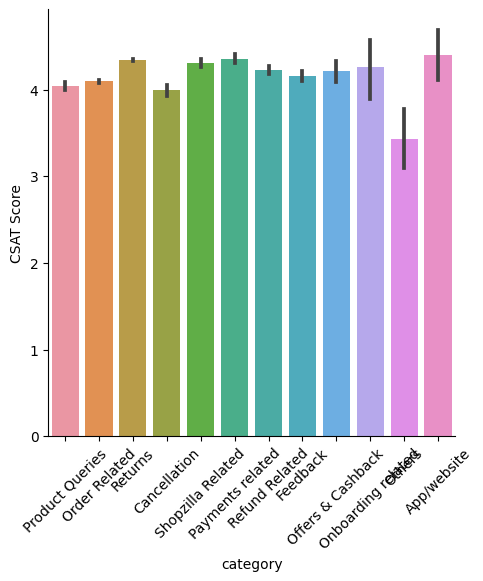

In [180]:
sns.catplot(data=CS_data, x="category", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

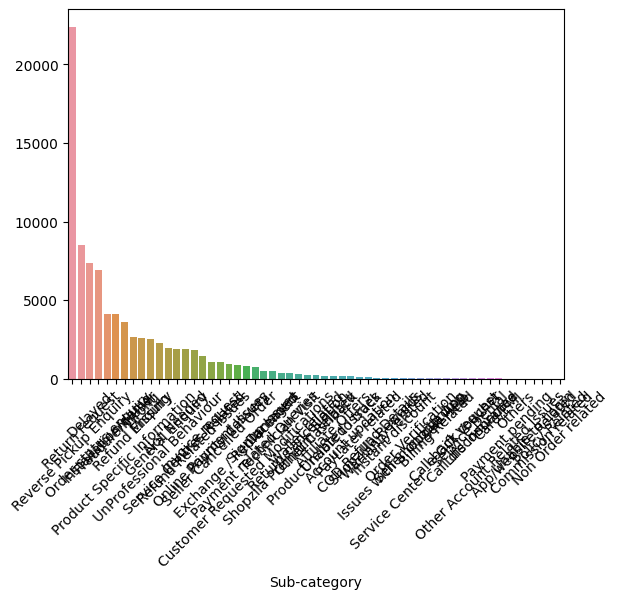

In [181]:
counts = CS_data['Sub-category'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



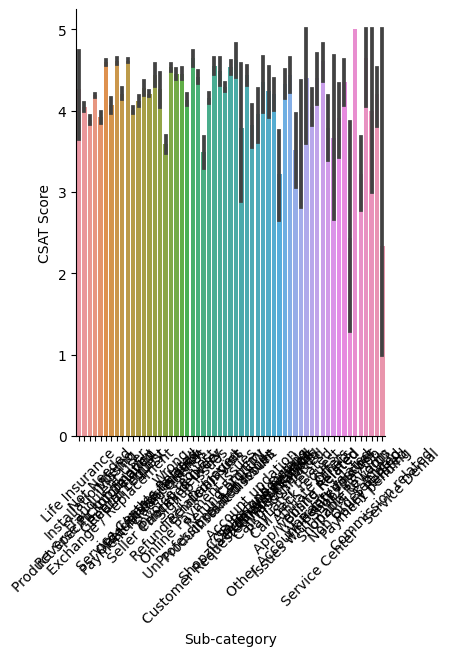

In [182]:
sns.catplot(data=CS_data, x="Sub-category", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

In [183]:
CS_data["Customer Remarks"].value_counts()

Customer Remarks
Good                                    1390
Good                                    1158
Very good                                569
Nice                                     316
Thanks                                   276
                                        ... 
Happy bahat khusi hua                      1
My problem didn't solved                   1
Thanks to filpkard team                    1
Love you sir                               1
need to improve with proper details.       1
Name: count, Length: 18231, dtype: int64

In [184]:
CS_data["Customer_City"].value_counts()

Customer_City
HYDERABAD    722
NEW DELHI    688
PUNE         435
MUMBAI       406
BANGALORE    352
            ... 
GUNTAKAL       1
MANSAR         1
BAGHMARA       1
HINDORIA       1
DORAHA         1
Name: count, Length: 1782, dtype: int64

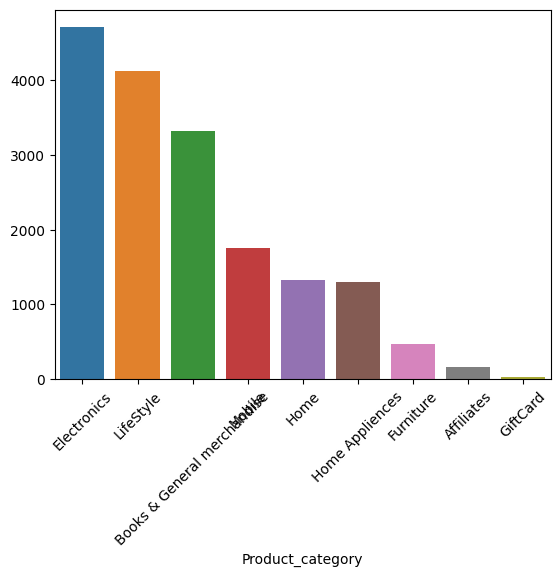

In [185]:
counts = CS_data['Product_category'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



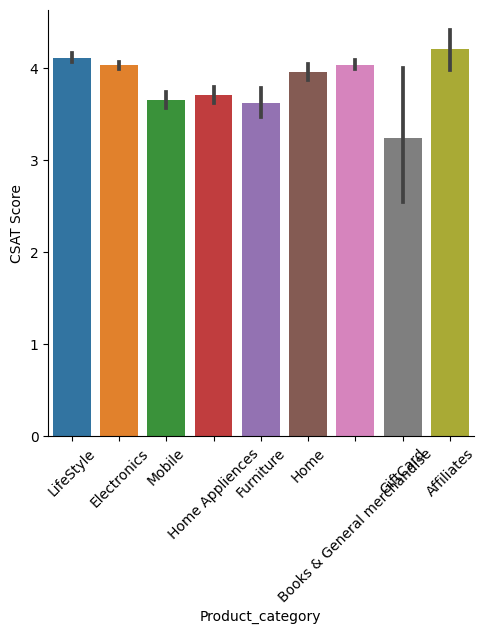

In [186]:
sns.catplot(data=CS_data, x="Product_category", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

In [187]:
CS_data["Agent_name"].value_counts()

Agent_name
Wendy Taylor         429
Timothy Huff         265
David Smith          264
Jamie Smith          253
Kayla Wilson         216
                    ... 
Amy Bell              20
John Torres           20
Stephanie Hammond     20
Summer Mitchell       20
Virginia Collins      20
Name: count, Length: 1371, dtype: int64

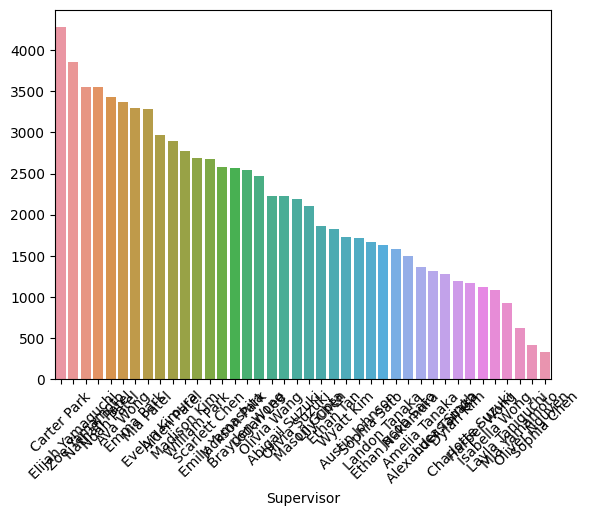

In [188]:
counts = CS_data['Supervisor'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



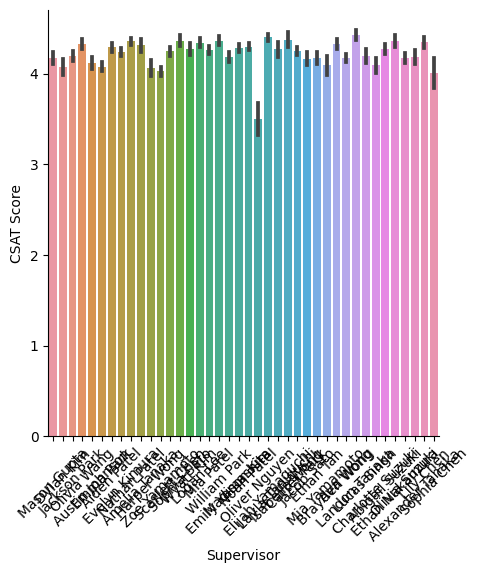

In [189]:
sns.catplot(data=CS_data, x="Supervisor", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

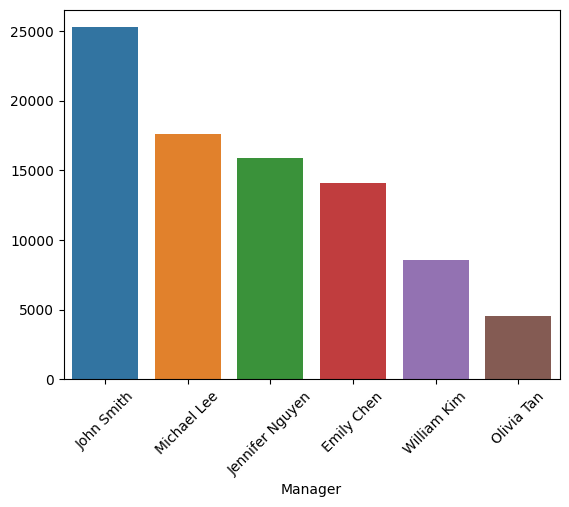

In [190]:
counts = CS_data['Manager'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



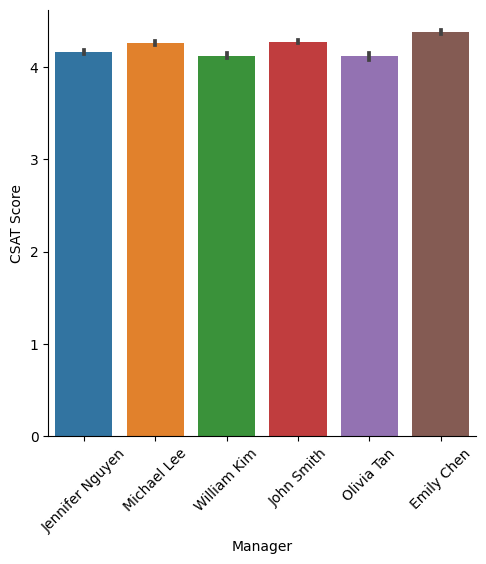

In [191]:
sns.catplot(data=CS_data, x="Manager", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Tenure Bucket'>

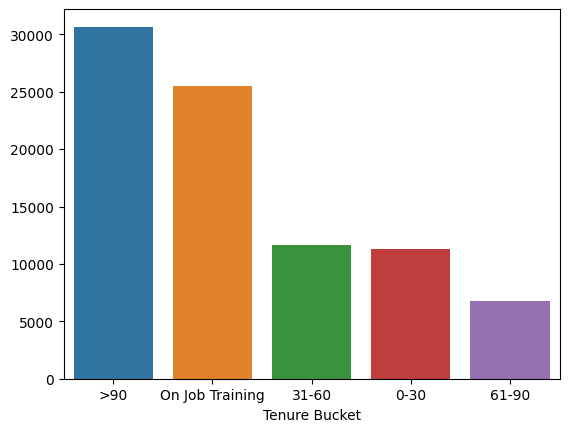

In [192]:
counts = CS_data['Tenure Bucket'].value_counts()
sns.barplot(x=counts.index, y=counts.values)

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



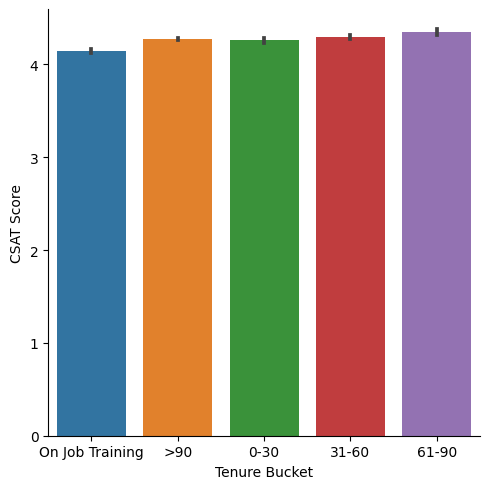

In [193]:
sns.catplot(data=CS_data, x="Tenure Bucket", y="CSAT Score", kind="bar")

<Axes: xlabel='Agent Shift'>

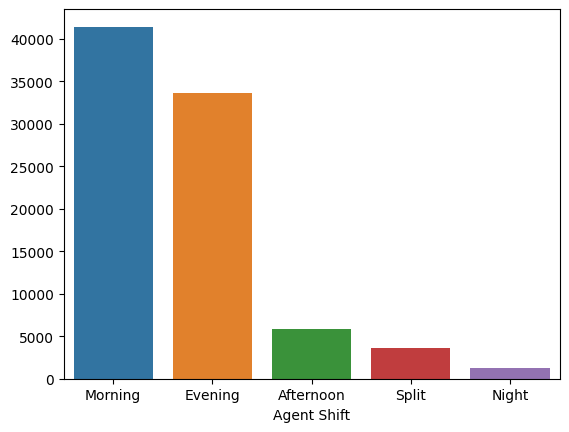

In [194]:
counts = CS_data['Agent Shift'].value_counts()
sns.barplot(x=counts.index, y=counts.values)

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



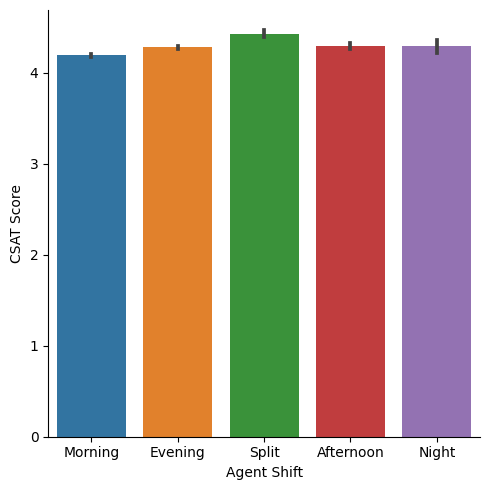

In [195]:
sns.catplot(data=CS_data, x="Agent Shift", y="CSAT Score", kind="bar")

In [196]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)

In [197]:
CS_data["Customer Remarks New"]

0        0
1        0
2        0
3        0
4        0
        ..
85902    0
85903    1
85904    1
85905    0
85906    0
Name: Customer Remarks New, Length: 85907, dtype: int32

In [198]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)
CS_data["Is_order"]

0        0
1        0
2        0
3        0
4        0
        ..
85902    0
85903    0
85904    0
85905    0
85906    0
Name: Is_order, Length: 85907, dtype: int32

In [199]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

CS_data["Sub-category"]

0                               Other
1        Product Specific Information
2                   Installation/demo
3              Reverse Pickup Enquiry
4                               Other
                     ...             
85902                           Other
85903                           Other
85904            Order status enquiry
85905                           Other
85906          Reverse Pickup Enquiry
Name: Sub-category, Length: 85907, dtype: object

In [200]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


In [201]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')
CS_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Other,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,...,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0,42
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,...,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0,32
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,...,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0,35
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,...,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0,48
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Other,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,...,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0,124


In [202]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'}).head(3)

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15


In [203]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

In [204]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

In [205]:
T_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [206]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)
T_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [207]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [208]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [209]:
dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = T_data.index)
dummies


,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


In [210]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

In [211]:
CS_dropped.head(3)

,channel_name,category,Product_category,connected_handling_time,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
0,Outcall,Product Queries,unknown,0,Jennifer Nguyen,On Job Training,Morning,5,0,0,42,41
1,Outcall,Product Queries,unknown,0,Michael Lee,>90,Morning,5,0,0,32,17
2,Inbound,Order Related,unknown,0,William Kim,On Job Training,Evening,5,0,0,35,46


In [212]:
CS_dropped.describe()

,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
count,85907.000000,85907.000000,85907.000000,85907.000000,85907.000000
mean,4.242157,0.319008,0.212230,82.733433,41.358690
std,1.378903,0.466095,0.408889,47.494745,15.862947
min,1.000000,0.000000,0.000000,20.000000,5.000000
25%,4.000000,0.000000,0.000000,53.000000,29.000000
50%,5.000000,0.000000,0.000000,75.000000,41.000000
75%,5.000000,1.000000,0.000000,102.000000,55.000000
max,5.000000,1.000000,1.000000,429.000000,70.000000


In [213]:
CS_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   channel_name             85907 non-null  object
 1   category                 85907 non-null  object
 2   Product_category         85907 non-null  object
 3   connected_handling_time  85907 non-null  object
 4   Manager                  85907 non-null  object
 5   Tenure Bucket            85907 non-null  object
 6   Agent Shift              85907 non-null  object
 7   CSAT Score               85907 non-null  int64 
 8   Customer Remarks New     85907 non-null  int32 
 9   Is_order                 85907 non-null  int32 
 10  Agent_count              85907 non-null  int64 
 11  Sups_no_agents           85907 non-null  int64 
dtypes: int32(2), int64(3), object(7)
memory usage: 7.2+ MB


In [214]:
CS_dummies = pd.get_dummies(CS_dropped)
CS_dummies.head()

,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,category_Cancellation,...,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,5,0,0,42,41,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,5,0,0,32,17,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,5,0,0,35,46,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,5,0,0,48,28,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,5,0,0,124,29,False,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False


In [215]:
CS_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Columns: 258 entries, CSAT Score to Agent Shift_Split
dtypes: bool(253), int32(2), int64(3)
memory usage: 23.3 MB


# Задания для самостоятельного выполнения

## 1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.

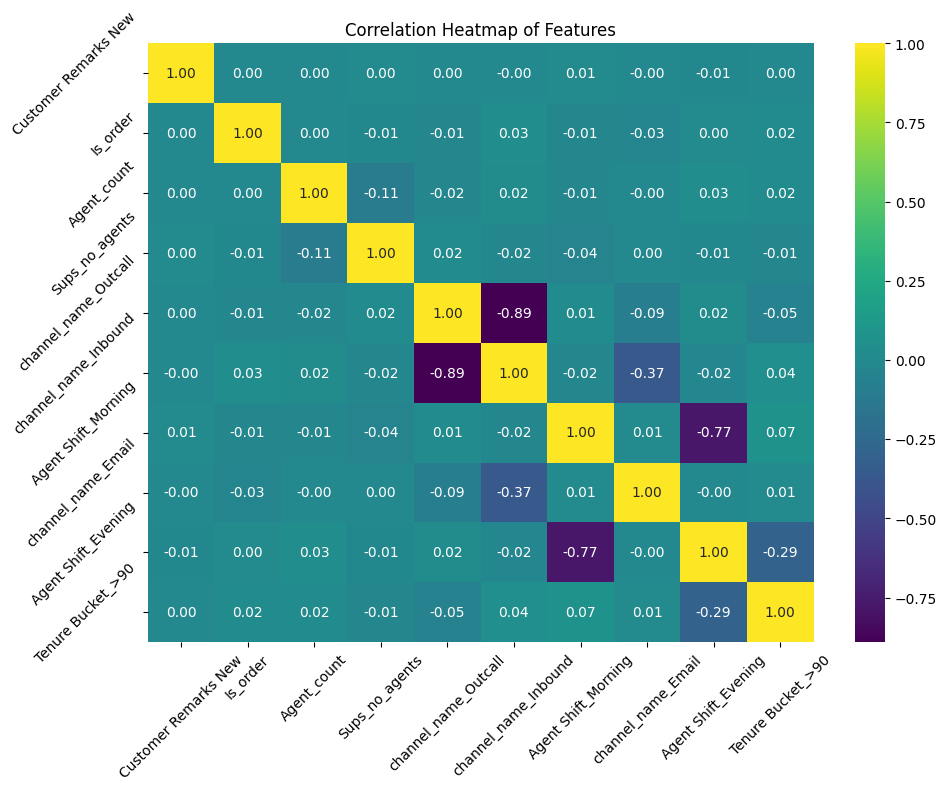

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Customer Remarks New', 'Is_order', 'Agent_count', 'Sups_no_agents', 
            'channel_name_Outcall', 'channel_name_Inbound', 'Agent Shift_Morning', 
            'channel_name_Email', 'Agent Shift_Evening', 'Tenure Bucket_>90']
plt.figure(figsize=(10, 8))
sns.heatmap(CS_dummies[features].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [217]:
import plotly.figure_factory as ff
import plotly.express as px

features = ['Customer Remarks New', 'Is_order', 'Agent_count', 'Sups_no_agents', 'channel_name_Outcall', 'channel_name_Inbound', 'Agent Shift_Morning', 'channel_name_Email', \
                      'Agent Shift_Evening', 'Tenure Bucket_>90']

# Создание тепловой карты корреляции с округлением до двух знаков после запятой
correlation_matrix = CS_dummies[features].corr().round(2)

fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=correlation_matrix.columns.tolist(),
                                  y=correlation_matrix.index.tolist(),
                                  colorscale='Viridis')

fig.update_layout(title_text='Correlation Heatmap of Features',
                  xaxis=dict(title='Features'),
                  yaxis=dict(title='Features'),
                  height=600, width=800)
fig.show()


## 2. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.

Accuracy: 0.6551041787917589


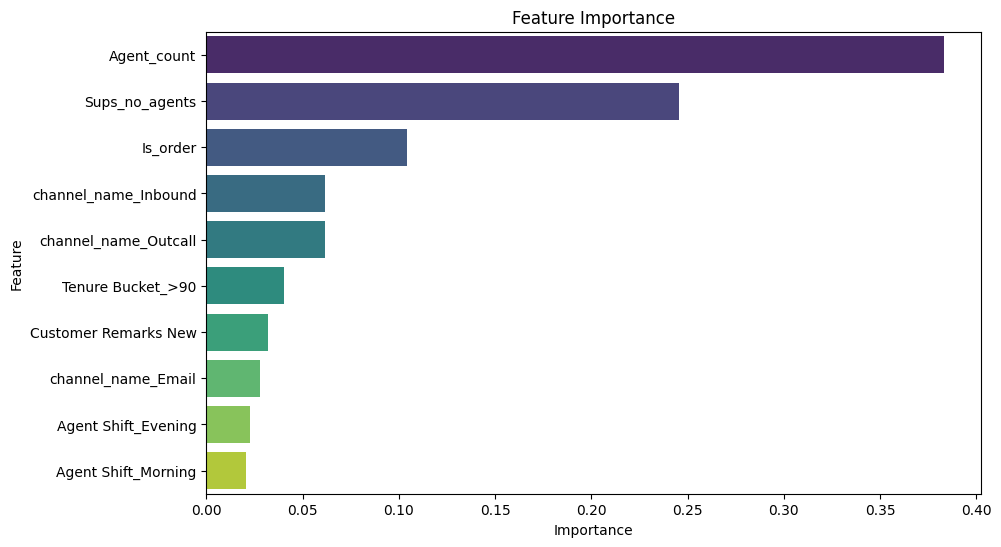

              precision    recall  f1-score   support

           1       0.26      0.12      0.16      2241
           2       0.00      0.00      0.00       227
           3       0.04      0.01      0.01       503
           4       0.13      0.03      0.04      2277
           5       0.70      0.92      0.79     11934

    accuracy                           0.66     17182
   macro avg       0.23      0.21      0.20     17182
weighted avg       0.54      0.66      0.58     17182



In [218]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

X = CS_dummies[features]
y = CS_dummies[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print(classification_report(y_test, y_pred))

In [219]:
y_test, y_pred

(67871    5
 40187    5
 60075    5
 69560    5
 2605     5
         ..
 55545    5
 72970    5
 50048    4
 23608    1
 73833    4
 Name: CSAT Score, Length: 17182, dtype: int64,
 array([5, 5, 5, ..., 5, 5, 5], dtype=int64))

## 3. Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки. Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = CS_dummies[features]
y = CS_dummies[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.

In [221]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [222]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [223]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

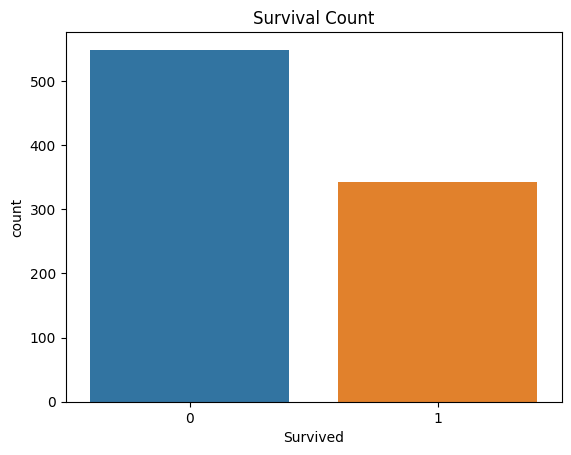

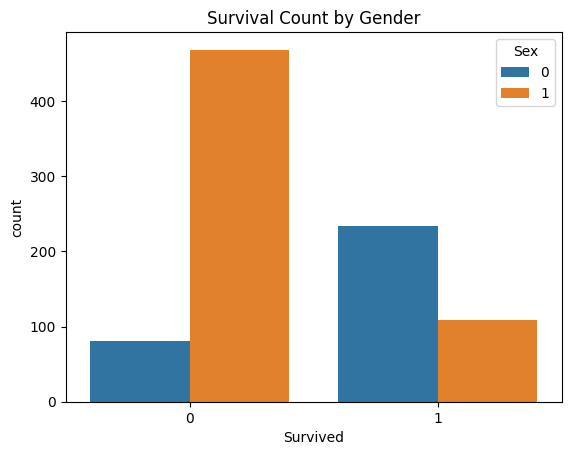

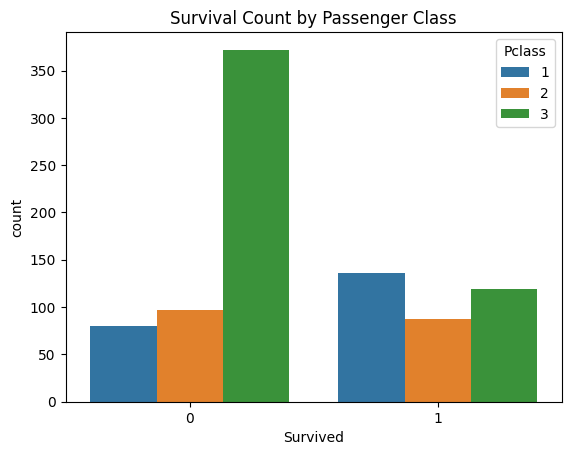

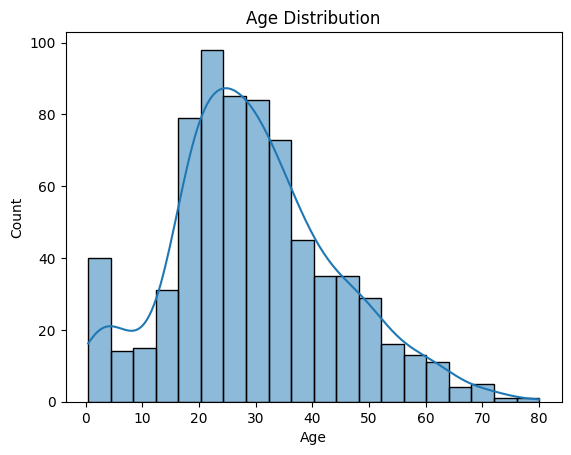

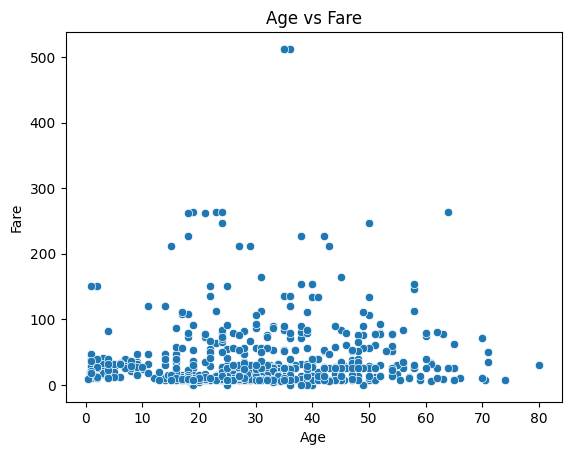

In [224]:
sns.countplot(x='Survived', data=T_data)
plt.title('Survival Count')
plt.show()

sns.countplot(x='Survived', hue='Sex', data=T_data)
plt.title('Survival Count by Gender')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=T_data)
plt.title('Survival Count by Passenger Class')
plt.show()

sns.histplot(T_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.scatterplot(x='Age', y='Fare', data=T_data)
plt.title('Age vs Fare')
plt.show()

## 5. Проверьте целесообразность каждого необязательного преобразования данных путем проверки, увеличивает ли данное преобразование точность модели. Проверьте на простом виде модели (линейная регрессия, дерево решений или случайный лес). Поэкспериментируйте с различными вариантами преобразований.

In [225]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [226]:
T_data.drop('Name', axis=1, inplace=True)
T_data.drop('Ticket', axis=1, inplace=True)
T_data.drop('Cabin', axis=1, inplace=True)

T_data = pd.get_dummies(T_data, columns=['Embarked'], drop_first=True)
T_data['Age'].fillna(T_data['Age'].mean(), inplace=True)

In [233]:
from sklearn.tree import DecisionTreeClassifier

X = T_data.drop('Survived', axis=1)
y = T_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_original = DecisionTreeClassifier(random_state=42)
dt_original.fit(X_train, y_train)
y_pred_original = dt_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Изначальная точность модели:", accuracy_original)


# Масштабирование
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_scaled = DecisionTreeClassifier(random_state=42)
dt_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = dt_scaled.predict(X_test_scaled)
accuracy_after_scaling = accuracy_score(y_test, y_pred_scaled)
print("Точность модели после масштабирования всех признаков:", accuracy_after_scaling)

# FamilySize
T_data['FamilySize'] = T_data['SibSp'] + T_data['Parch'] + 1

dt_imputed = DecisionTreeClassifier(random_state=42)
dt_imputed.fit(X_train, y_train)
y_pred_imputed = dt_imputed.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_imputed)
print("Точность модели после преобразования данных с новым признаком 'FamilySize':", accuracy_after)

# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

dt_poly = DecisionTreeClassifier(random_state=42)
dt_poly.fit(X_train_poly, y_train)
y_pred_poly = dt_poly.predict(X_test_poly)
accuracy_after_poly = accuracy_score(y_test, y_pred_poly)
print("Точность модели после добавления полиномиальных признаков:", accuracy_after_poly)

Изначальная точность модели: 0.7597765363128491
Точность модели после масштабирования всех признаков: 0.7597765363128491
Точность модели после преобразования данных с новым признаком 'FamilySize': 0.7597765363128491
Точность модели после добавления полиномиальных признаков: 0.7541899441340782


Если признаки имеют разные единицы измерения или разный масштаб значений, то некоторые алгоритмы могут работать неэффективно или давать искажённые результаты. Например, если один признак имеет значения в диапазоне от 1 до 100, а другой - от 1 до 1000, алгоритм может считать, что признак с большими значениями важнее, что может привести к искажению результатов.

Это позволяет модели учитывать нелинейные взаимодействия между признаками.

Например, если у нас есть признак<p>
x, мы можем создать новый признак, возведя <p>
x в квадрат, куб или в другую степень. Это может быть полезно, если связь между признаком и целевой переменной нелинейная.

In [230]:
T_data['SibSp']
# T_data. 'SibSp' обозначает количество братьев/сестер или супругов на борту Титаника для каждого человека.

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [231]:
T_data['Parch']
# T_data. 'Parch' обозначает количество родителей/детей на борту Титаника для каждого человека.

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

## 6. Создайте воспроизводимый код обработки данного датасета.

Воспроизводимый код обработки датасета - это код, который можно запустить в любое время и в любом окружении, и он всегда будет давать одинаковые результаты. Это важно для научных исследований и машинного обучения, где важно, чтобы другие могли проверить и повторить ваши результаты.

### Укрупнение категорий

In [239]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)

CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)

CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry", 
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

### Добавление агрегированной информации

In [240]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')

CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

### Заполнение отсутствующих значений

In [241]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

### Удаление лишних столбцов и массовое преобразование

In [245]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

CS_dummies = pd.get_dummies(CS_dropped)

### Обучение модели и вывод метрики

In [246]:
y = CS_dummies['CSAT Score']
X = CS_dummies.drop('CSAT Score', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5620416715167035
